In [1]:
using ImageCore,FixedPointNumbers,Colors,OffsetArrays,Plots,ImageIO,FileIO,ImageShow

In [2]:
## Cell 1
## Run this cell at the beginning
## using Images,ImageIO,OffsetArrays,Plots

function blueify(img, lower, upper)
    imgout = deepcopy(img)
    for i in eachindex(imgout)
        px = img[i]
        macks = px.r
        if px.g > px.r
            macks = px.g
        end
        if px.b > px.r && px.b > px.g
            macks = px.b
        end
        if lower <= macks * 65535 <= upper
            imgout[i] = RGB(0, 0, 1)
        end
    end
    return imgout
end

function make_mappe(bottoms, tops, lower, upper)
    global mappe
    for i in eachindex(bottoms)
        b = lower[i]
        m = (upper[i] - lower[i]) / (tops[i] - bottoms[i])
        ctr = 0
        for ptr in bottoms[i]:tops[i]
            target = b + m * (ptr - bottoms[i])
            if target > 65535
                target = 65535
            end
            mappe[ptr] = trunc(UInt16, target)
        end
    end
end            
     
function remappe(img, mapping)
    imgout = deepcopy(img)
    bright = 0
    ctr = 0
    for i in eachindex(imgout)
        pixel = img[i]
        m = mackses[i]
        if m > 65535 # not supposed to happen!
            m = 65535
        end
        idx = mappe[trunc(Int32, m)]
        if m == 0
            factor = 1
        else
            factor = idx / m
        end
        new_red = pixel.r * factor
        if new_red > 1
            new_red = 1
        end
        new_green = pixel.g * factor
        if new_green > 1
            new_green = 1
        end
        new_blue = pixel.b * factor
        if new_blue > 1
            new_blue = 1
        end
        imgout[i] = RGB(new_red, new_green, new_blue)
        diff = new_red - pixel.r
    end
    return imgout
end

mappe = OffsetArray(UInt16.(collect(0:65535)), -1);

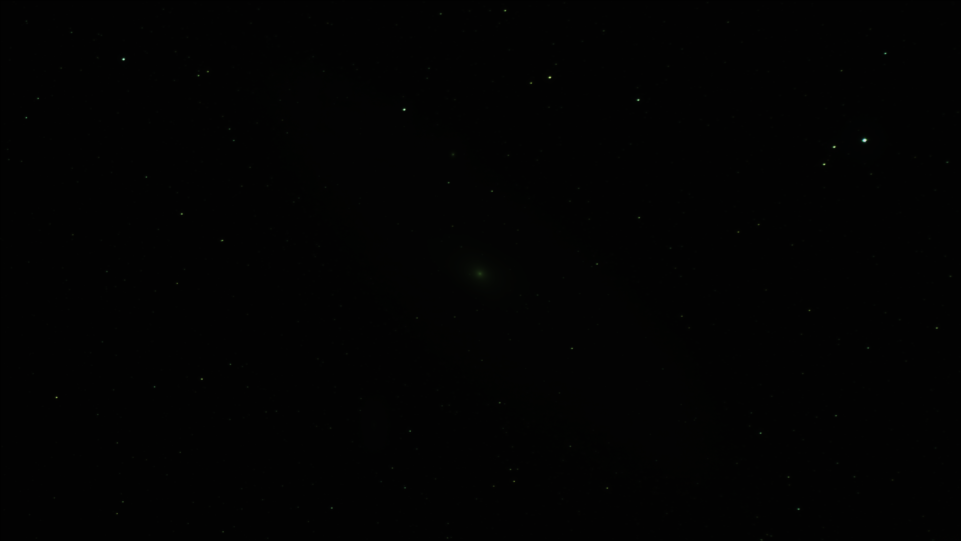

In [33]:
## Cell 2
## Edit the filename here and then run this cell
img = load("M1_raw.png")

In [34]:
## Cell 3
mackses = zeros(size(img))
for i in eachindex(img)
    pixel = img[i]
    if pixel.r > pixel.g
        if pixel.b > pixel.r
            x = pixel.b
        else
            x = pixel.r
        end
    elseif pixel.g > pixel.b
        x = pixel.g
    else
        x = pixel.r
    end
    x = x * 65536
    mackses[i] = x
end

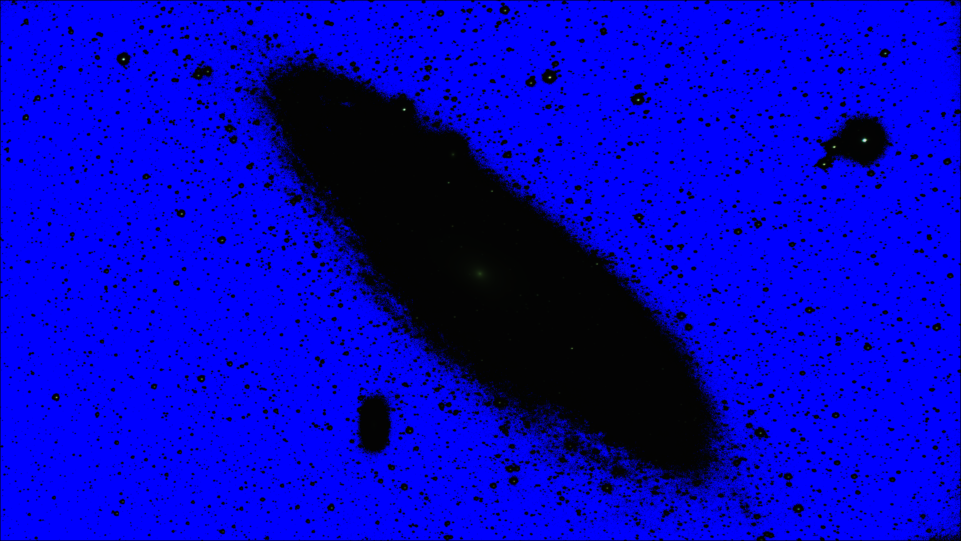

In [57]:
## Cell 4
blueify(img, 0, 520)

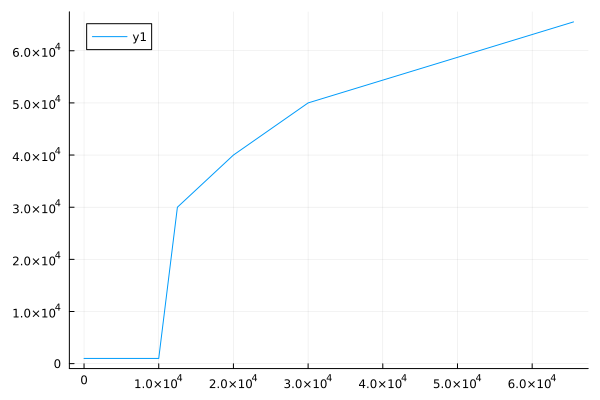

In [29]:
## Cell 5
# core at 5000 with a small peak at 10K
# next layer 1500+
# arms at 520
bottoms = [0, 520, 12500, 20000, 30000];
tops = copy(bottoms);
popfirst!(tops)
push!(tops, 65535);
lowers = [1000, 1000, 30000, 40000, 50000];
uppers = copy(lowers)
popfirst!(uppers);
push!(uppers, 65535);

make_mappe(bottoms, tops, lowers, uppers);
plot(mappe)

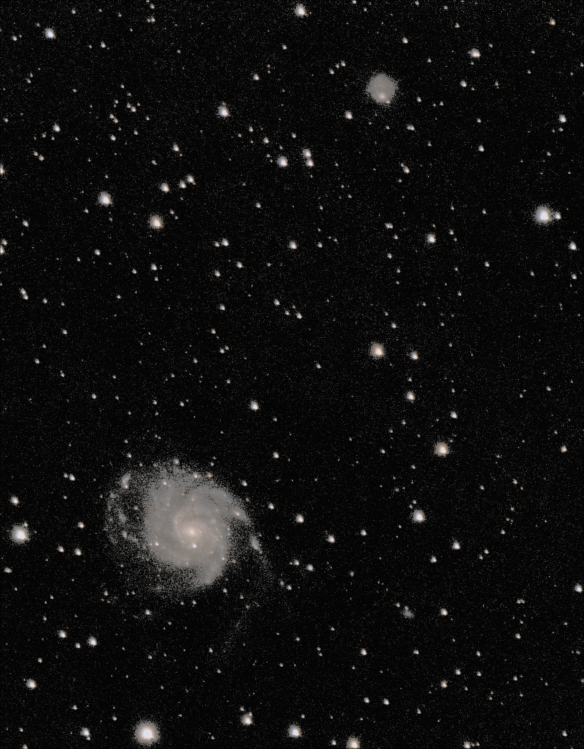

In [30]:
## Cell 6
final = remappe(img, mappe)

In [7]:
save("E:/Dwarf/Pinwheel/processed.png", final)